In [6]:
#依照原作者重新實現
import numpy as np
import cv2 as cv
filename = 'chessboard.png'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv.imshow('dst',img)
cv.waitKey(0)
cv.destroyAllWindows()

In [7]:
#替換輸入端
import numpy as np
import cv2 as cv
filename = r'D:\Python\Computer Vision\proj3_6320\data\1a_notredame.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv.imshow('dst',img)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
#解析
import numpy as np
import cv2 as cv
filename = r'D:\Python\Computer Vision\proj3_6320\data\1a_notredame.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04) #找出特徵點
dst = cv.dilate(dst,None) #特徵-膨脹
img[dst>0.01*dst.max()]=[0,0,255] #取最大特徵值乘以 10% 的特徵
cv.imshow('dst',img)
cv.waitKey(0)
cv.destroyAllWindows()

# SIFT

In [12]:
import numpy as np
import cv2 as cv
img = cv.imread(r'D:\Python\Computer Vision\proj3_6320\data\1a_notredame.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img)
cv.namedWindow('dst', cv.WINDOW_NORMAL)
cv.imshow('dst',img)
cv.waitKey(0)
cv.destroyAllWindows()

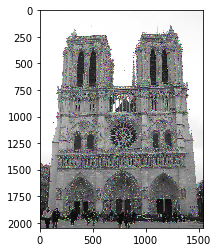

In [14]:
#https://kknews.cc/zh-tw/code/e6brxxr.html

import cv2

import matplotlib.pyplot as plt

%matplotlib inline


#reading image

img1 = cv2.imread(r'D:\Python\Computer Vision\proj3_6320\data\1a_notredame.jpg')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#keypoints

sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)

plt.imshow(img_1)


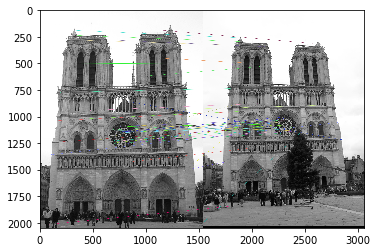

(<matplotlib.image.AxesImage at 0x18911ef4e10>, None)

In [21]:
import cv2

import matplotlib.pyplot as plt

%matplotlib inline


# read images

img1 = cv2.imread(r'D:\Python\Computer Vision\proj3_6320\data\1a_notredame.jpg')

img2 = cv2.imread(r'D:\Python\Computer Vision\proj3_6320\data\1b_notredame.jpg')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)



#sift

sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)


#feature matching

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)

matches =sorted(matches, key=lambda x:x.distance)

#draw out
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()


